<a href="https://colab.research.google.com/github/santhosh1417ai/CODSOFT-/blob/main/data_science_TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-4 SALES PREDICTION USING PYTHON**

In [ ]:
#@title Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
#@title Load the Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/advertising.csv')
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


(200, 4)

In [ ]:
#@title data cleaning
data.isnull().sum()*100/data.shape[0]

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


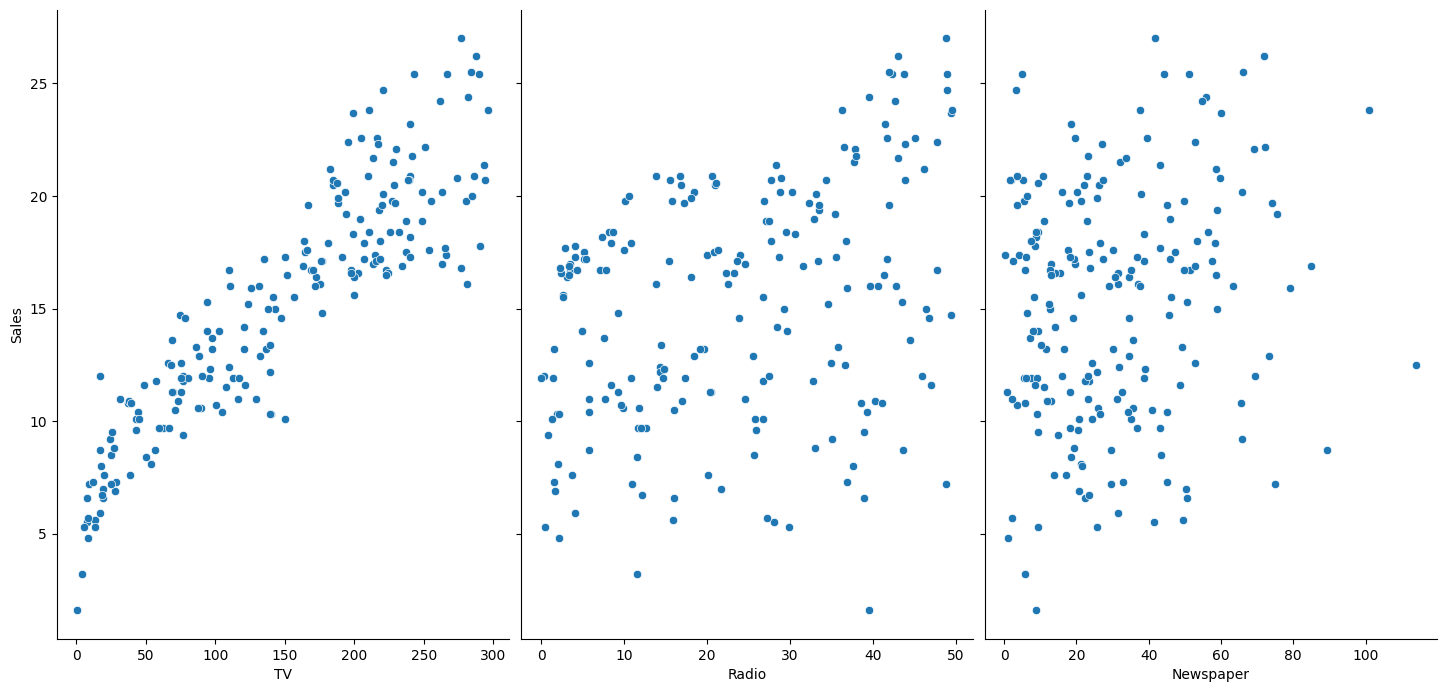

In [ ]:
#@title sactter plot
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7)
plt.show()

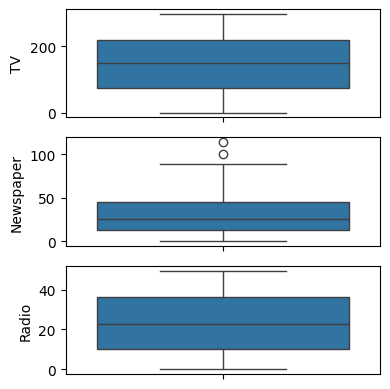

In [ ]:
fig, axs = plt.subplots(3, figsize = (4,4))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

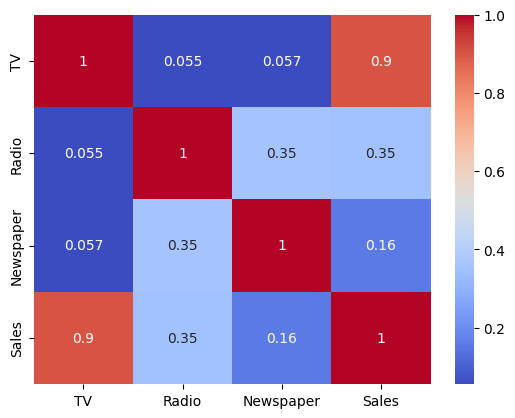

In [ ]:
#@title Correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


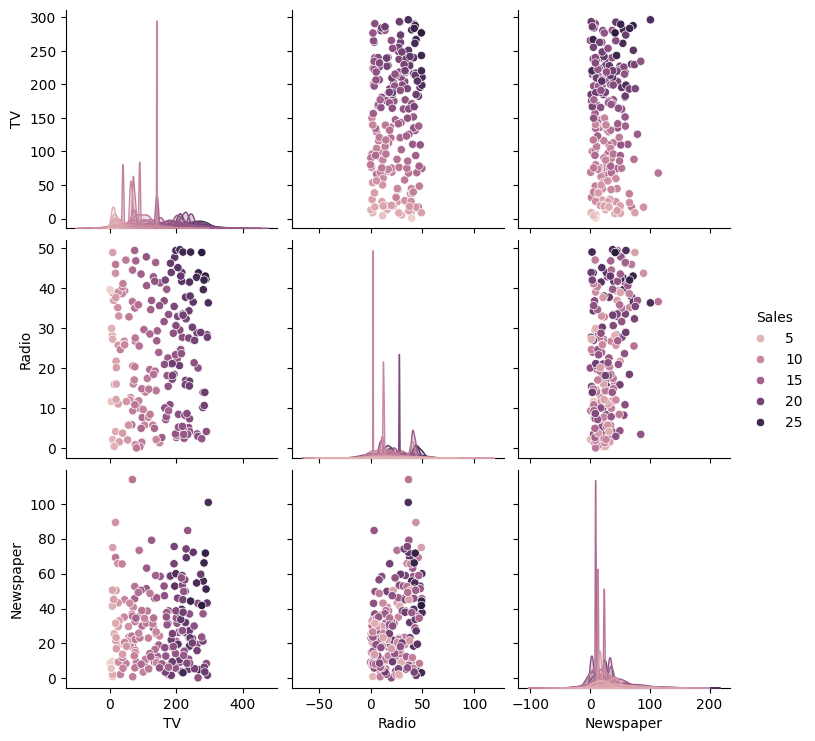

In [ ]:
sns.pairplot(data, hue='Sales', diag_kind='kde')
plt.show()

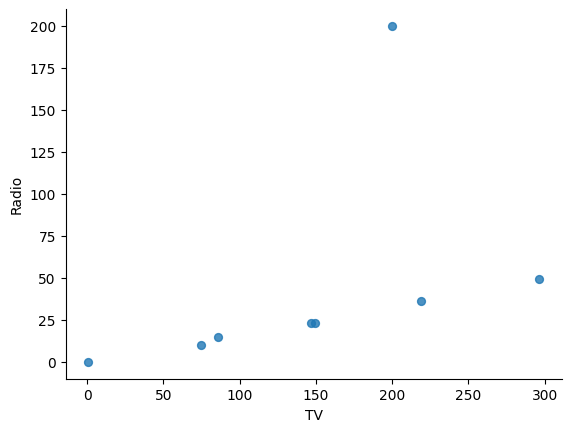

In [ ]:
_df_4.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

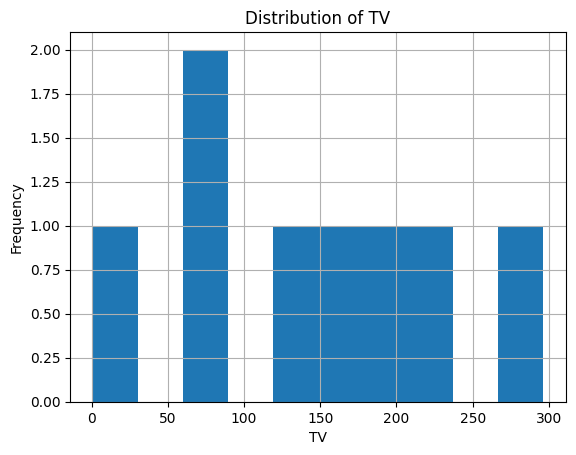

<Figure size 200x200 with 0 Axes>

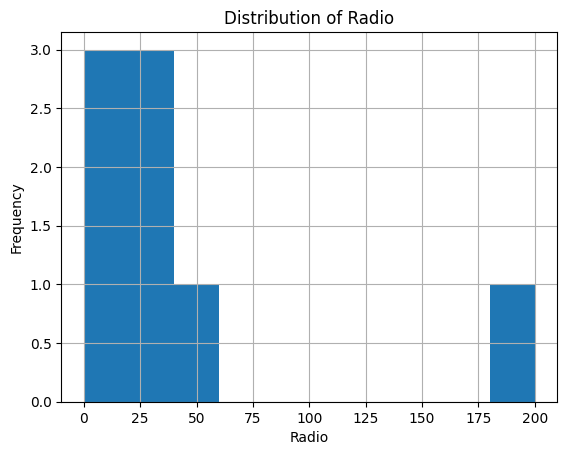

<Figure size 200x200 with 0 Axes>

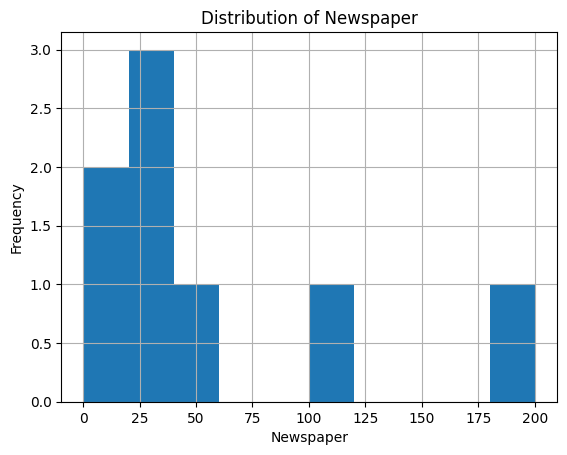

<Figure size 200x200 with 0 Axes>

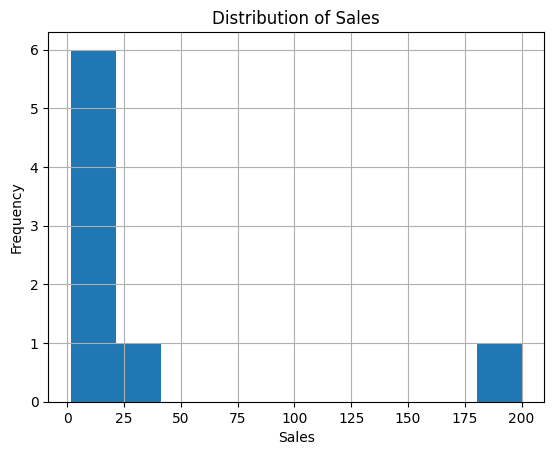

<Figure size 200x200 with 0 Axes>

In [ ]:
#@title Distribution
for column in _df_0.columns:
        _df_0[column].hist(bins=10)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.figure(figsize=(2, 2))
        plt.show()

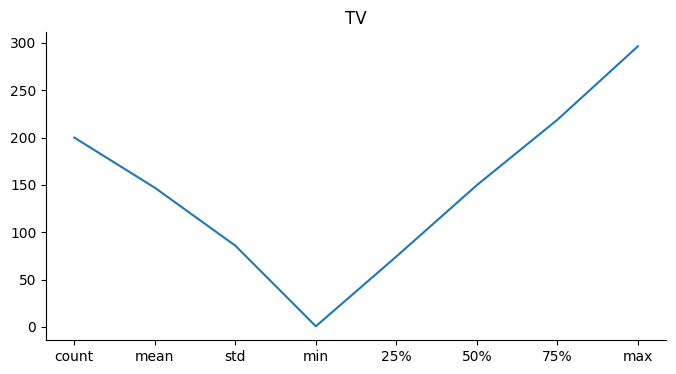

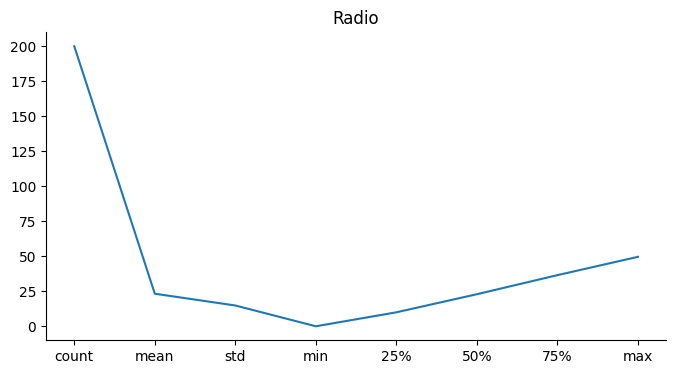

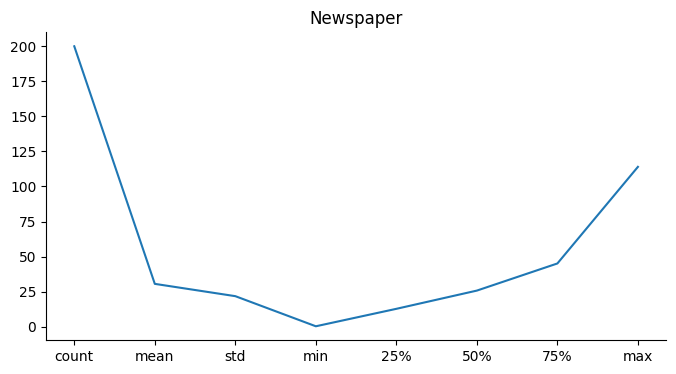

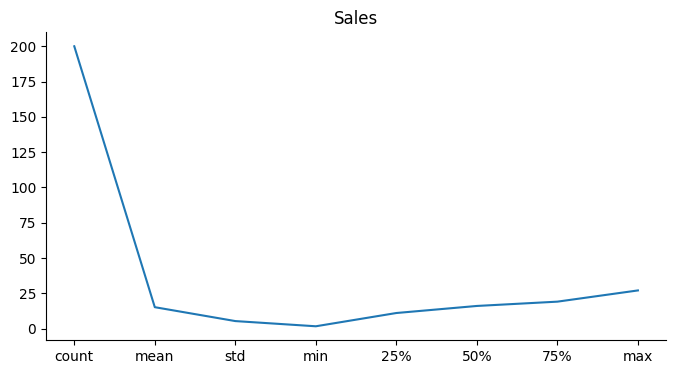

In [ ]:
#@title value
for column in _df_7.columns:
    _df_7[column].plot(kind='line', figsize=(8,4), title=column)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

In [ ]:
#@title Model Training
from sklearn.preprocessing import PolynomialFeatures

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression (Baseline Model)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# 2. Linear Regression with Interaction Terms
poly_interaction = PolynomialFeatures(degree=2, interaction_only=True)
X_train_interaction = poly_interaction.fit_transform(X_train)
model_interaction = LinearRegression()
model_interaction.fit(X_train_interaction, y_train)

# 3. Linear Regression with Polynomial Features (Degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

print("Models trained:")
print("- Linear Regression (Baseline)")
print("- Linear Regression with Interaction Terms")
print("- Linear Regression with Polynomial Features (Degree 2)")

Models trained:
- Linear Regression (Baseline)
- Linear Regression with Interaction Terms
- Linear Regression with Polynomial Features (Degree 2)


In [ ]:
#@title OLS Regression
import statsmodels.api as sm

X_train_poly3_with_const = sm.add_constant(X_train_poly3)
model_ols = sm.OLS(y_train, X_train_poly3_with_const).fit()

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     217.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           2.30e-81
Time:                        07:01:34   Log-Likelihood:                -278.70
No. Observations:                 160   AIC:                             577.4
Df Residuals:                     150   BIC:                             608.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1509      0.610      8.440      0.0

In [ ]:
#@title Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression without feature engineering ---
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
print("Linear Regression MSE (without feature engineering):", mse1)

# --- Model 2: Linear Regression with interaction terms ---
poly2 = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_poly2, y_train)
y_pred2 = model2.predict(X_test_poly2)
mse2 = mean_squared_error(y_test, y_pred2)
print("Linear Regression MSE (with interaction terms):", mse2)

# --- Model 3: Linear Regression with polynomial features (degree 2) ---
poly3 = PolynomialFeatures(degree=2)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

model3 = LinearRegression()
model3.fit(X_train_poly3, y_train)
y_pred3 = model3.predict(X_test_poly3)
mse3 = mean_squared_error(y_test, y_pred3)
print("Linear Regression MSE (with polynomial features, degree 2):", mse3)

Linear Regression MSE (without feature engineering): 2.9077569102710896
Linear Regression MSE (with interaction terms): 2.3375960612349473
Linear Regression MSE (with polynomial features, degree 2): 1.44254263690159


In [ ]:
#@title Model Prediction
best_model = model3

# New data for prediction (replace with your actual data)
new_data = pd.DataFrame({
    'TV': [200, 150, 300],
    'Radio': [30, 20, 10],
    'Newspaper': [15, 10, 20]
})

# Transform new data if necessary (depends on the best model)
if best_model == model2:
    new_data_transformed = poly2.transform(new_data)
elif best_model == model3:
    new_data_transformed = poly3.transform(new_data)
else:  # If best_model is the baseline model1
    new_data_transformed = new_data

# Make predictions
predictions = best_model.predict(new_data_transformed)

# Print predictions
print(predictions)

[19.00490147 15.3819144  19.44917526]


MAE: 0.9033713382792442
MSE: 1.44254263690159
RMSE: 1.2010589647896517
R^2: 0.9533174341074723


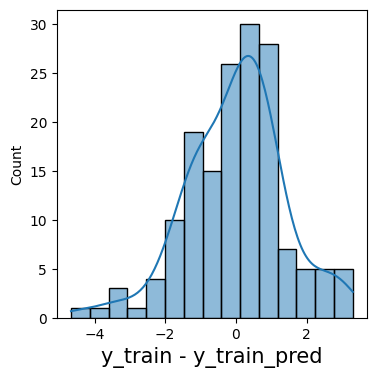

In [ ]:
#@title Model Evaluation
best_model = model3
y_pred = best_model.predict(X_test_poly3)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

ig = plt.figure(figsize=(4,4))
sns.histplot(res, bins = 15, kde=True) # Use histplot instead of distplot
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


In [ ]:
#@title Model Tuning and Regularization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso

# --- Hyperparameter Tuning ---

# 1. Grid Search for Linear Regression with Polynomial Features (Degree 2)
param_grid = {'fit_intercept': [True, False] }

grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly3, y_train)

print("Best parameters found by Grid Search:", grid_search.best_params_)
best_model_grid = grid_search.best_estimator_

# --- Regularization ---
# 1. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly3, y_train)

# 2. Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_poly3, y_train)

Best parameters found by Grid Search: {'fit_intercept': True}


Lasso()

In [ ]:
#@title Predictions and Forecasts
# --- Predictions on Test Set ---
# Assuming 'best_model' is your chosen model (e.g., from GridSearchCV)
y_pred_test = best_model.predict(X_test_poly3)  # Use transformed test data if necessary

# Print or visualize predictions against actual values
print(y_pred_test)

# --- Sales Forecasts for Future Period ---
# 1. Create a DataFrame for future data
future_data = pd.DataFrame({
    'TV': [250, 180, 320],  # Example values for future advertising spending
    'Radio': [35, 25, 15],
    'Newspaper': [20, 12, 25]
})

# 2. Transform future data if necessary (based on the best_model)
if 'poly3' in locals():  # Check if poly3 was used for feature engineering
    future_data_transformed = poly3.transform(future_data)
else:
    future_data_transformed = future_data  # No transformation needed for baseline model

# 3. Make predictions on future data
future_predictions = best_model.predict(future_data_transformed)

# 4. Print or visualize the forecasted sales
print(future_predictions)

[17.562438   21.96285664 22.07580481  7.34916293 23.23684435 12.37109504
 22.12872506  8.76904874 17.01492635 16.91480608  7.86402513  9.1023732
 17.43691412  5.99987179 13.70960498 15.38247085  6.28283192 18.02070399
 10.95120455 20.20193781 20.93683157 13.01896785  9.65505427 22.48602888
 10.0006458   8.88804873 21.83258724 14.37821146 11.24748724  6.08610266
 16.1977029  10.4879825  22.56616524  9.20046174 19.54142042 21.31849501
 11.27647626 21.73705841 13.18303888  7.12553149]
[21.8921905  17.41417038 20.42328724]


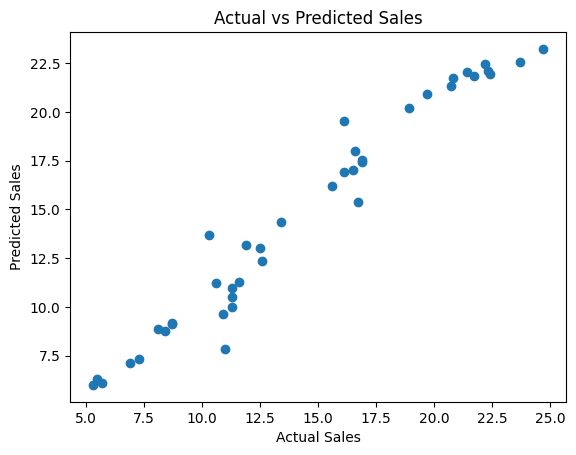

In [ ]:
# Plot actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
